In [132]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras


train = pd.read_csv("data/segmentation_target.test")
test = pd.read_csv("data/segmentation_target.data")

print(f"{train.shape=}")
print(f"{test.shape=}")

val_dataframe = train.sample(frac=1)
train_dataframe = test.sample(frac=1)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

train.shape=(2100, 20)
test.shape=(210, 20)
Using 210 samples for training and 2100 for validation


In [133]:
max_seqlen = 150
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    dataframe["TARGET"] = dataframe["TARGET"].apply(lambda a: str(a))
    print(dataframe["TARGET"].values[:10])


    ###

    # terms = tf.ragged.constant(dataframe["TARGET"].values)
    # lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
    # lookup.adapt(terms)
    # vocab = lookup.get_vocabulary()
    #
    # def invert_multi_hot(encoded_labels):
    #     """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    #     hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    #     return np.take(vocab, hot_indices)


    # print("Vocabulary:")
    # print(vocab)

    ###
    #
    # sample_label = dataframe["TARGET"].iloc[0]
    # print(f"Original label: {sample_label}")
    #
    # label_binarized = lookup([sample_label])
    # print(f"Label-binarized representation: {label_binarized}")

    ###

    # labels = tf.ragged.constant(dataframe["TARGET"].values)
    # label_binarized = lookup(labels).numpy()
    #
    # dataframe.pop("TARGET")
    #
    # print("label_binarized:\n", label_binarized)

    ###

    labels = dataframe.pop("TARGET")

    labels_cat = keras.utils.to_categorical(labels)
    print(labels_cat)

    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels_cat))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

['1' '4' '5' '0' '2' '3' '1' '0' '5' '4']
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
['0' '6' '0' '6' '3' '1' '4' '1' '0' '3']
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [134]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("\n\nTarget:", y)

Input: {'REGION-CENTROID-COL': <tf.Tensor: shape=(), dtype=float64, numpy=2.0>, 'REGION-CENTROID-ROW': <tf.Tensor: shape=(), dtype=float64, numpy=245.0>, 'REGION-PIXEL-COUNT': <tf.Tensor: shape=(), dtype=int64, numpy=9>, 'SHORT-LINE-DENSITY-5': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'SHORT-LINE-DENSITY-2': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'VEDGE-MEAN': <tf.Tensor: shape=(), dtype=float64, numpy=1.8888888>, 'VEDGE-SD': <tf.Tensor: shape=(), dtype=float64, numpy=2.162963>, 'HEDGE-MEAN': <tf.Tensor: shape=(), dtype=float64, numpy=3.1666667>, 'HEDGE-SD': <tf.Tensor: shape=(), dtype=float64, numpy=3.2777781>, 'INTENSITY-MEAN': <tf.Tensor: shape=(), dtype=float64, numpy=6.4074073>, 'RAWRED-MEAN': <tf.Tensor: shape=(), dtype=float64, numpy=6.2222223>, 'RAWBLUE-MEAN': <tf.Tensor: shape=(), dtype=float64, numpy=6.0>, 'RAWGREEN-MEAN': <tf.Tensor: shape=(), dtype=float64, numpy=7.0>, 'EXRED-MEAN': <tf.Tensor: shape=(), dtype=float64, numpy=-0.5555556>, 'EXBLUE-MEAN': <tf

In [135]:
train_ds = train_ds.batch(1)
val_ds = val_ds.batch(1)

In [136]:
from keras.layers import Normalization

def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature

In [137]:
from keras import layers
# Numerical features
f1 = keras.Input(shape=(1,), name="REGION-CENTROID-COL")
f2 = keras.Input(shape=(1,), name="REGION-CENTROID-ROW")
f3 = keras.Input(shape=(1,), name="REGION-PIXEL-COUNT")
f4 = keras.Input(shape=(1,), name="SHORT-LINE-DENSITY-5")
f5 = keras.Input(shape=(1,), name="SHORT-LINE-DENSITY-2")
f6 = keras.Input(shape=(1,), name="VEDGE-MEAN")
f7 = keras.Input(shape=(1,), name="VEDGE-SD")
f8 = keras.Input(shape=(1,), name="HEDGE-MEAN")
f9 = keras.Input(shape=(1,), name="HEDGE-SD")
f10 = keras.Input(shape=(1,), name="INTENSITY-MEAN")
f11 = keras.Input(shape=(1,), name="RAWRED-MEAN")
f12 = keras.Input(shape=(1,), name="RAWBLUE-MEAN")
f13 = keras.Input(shape=(1,), name="RAWGREEN-MEAN")
f14 = keras.Input(shape=(1,), name="EXRED-MEAN")
f15 = keras.Input(shape=(1,), name="EXBLUE-MEAN")
f16 = keras.Input(shape=(1,), name="EXGREEN-MEAN")
f17 = keras.Input(shape=(1,), name="VALUE-MEAN")
f18 = keras.Input(shape=(1,), name="SATURATION-MEAN")
f19 = keras.Input(shape=(1,), name="HUE-MEAN")

all_inputs = [
    f1,
    f2,
    f3,
    f4,
    f5,
    f6,
    f7,
    f8,
    f9,
    f10,
    f11,
    f12,
    f13,
    f14,
    f15,
    f16,
    f17,
    f18,
    f19,
]

f1_encoded = encode_numerical_feature(f1, "REGION-CENTROID-COL", train_ds)
f2_encoded = encode_numerical_feature(f2, "REGION-CENTROID-ROW", train_ds)
f3_encoded = encode_numerical_feature(f3, "REGION-PIXEL-COUNT", train_ds)
f4_encoded = encode_numerical_feature(f4, "SHORT-LINE-DENSITY-5", train_ds)
f5_encoded = encode_numerical_feature(f5, "SHORT-LINE-DENSITY-2", train_ds)
f6_encoded = encode_numerical_feature(f6, "VEDGE-MEAN", train_ds)
f7_encoded = encode_numerical_feature(f7, "VEDGE-SD", train_ds)
f8_encoded = encode_numerical_feature(f8, "HEDGE-MEAN", train_ds)
f9_encoded = encode_numerical_feature(f9, "HEDGE-SD", train_ds)
f10_encoded = encode_numerical_feature(f10, "INTENSITY-MEAN", train_ds)
f11_encoded = encode_numerical_feature(f11, "RAWRED-MEAN", train_ds)
f12_encoded = encode_numerical_feature(f12, "RAWBLUE-MEAN", train_ds)
f13_encoded = encode_numerical_feature(f13, "RAWGREEN-MEAN", train_ds)
f14_encoded = encode_numerical_feature(f14, "EXRED-MEAN", train_ds)
f15_encoded = encode_numerical_feature(f15, "EXBLUE-MEAN", train_ds)
f16_encoded = encode_numerical_feature(f16, "EXGREEN-MEAN", train_ds)
f17_encoded = encode_numerical_feature(f17, "VALUE-MEAN", train_ds)
f18_encoded = encode_numerical_feature(f18, "SATURATION-MEAN", train_ds)
f19_encoded = encode_numerical_feature(f19, "HUE-MEAN", train_ds)

all_features = layers.concatenate(
    [
        f1_encoded,
        f2_encoded,
        f3_encoded,
        f4_encoded,
        f5_encoded,
        f6_encoded,
        f7_encoded,
        f8_encoded,
        f9_encoded,
        f10_encoded,
        f11_encoded,
        f12_encoded,
        f13_encoded,
        f14_encoded,
        f15_encoded,
        f16_encoded,
        f17_encoded,
        f18_encoded,
        f19_encoded,
    ]
)

x = layers.Dense(32, activation=keras.activations.tanh)(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(7, activation=keras.activations.softmax)(x)
model = keras.Model(all_inputs, output)

model.compile("adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy", "binary_accuracy", "categorical_accuracy"])

In [138]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [140]:
history = model.fit(
    train_ds, validation_data=val_ds, epochs=15
)

Epoch 1/15
210/210 [==============================] - 8s 38ms/step - loss: 0.3062 - accuracy: 0.9190 - binary_accuracy: 0.9748 - categorical_accuracy: 0.9190 - val_loss: 0.3065 - val_accuracy: 0.9033 - val_binary_accuracy: 0.9729 - val_categorical_accuracy: 0.9033
Epoch 2/15
210/210 [==============================] - 4s 21ms/step - loss: 0.3156 - accuracy: 0.8762 - binary_accuracy: 0.9673 - categorical_accuracy: 0.8762 - val_loss: 0.3015 - val_accuracy: 0.9052 - val_binary_accuracy: 0.9730 - val_categorical_accuracy: 0.9052
Epoch 3/15
210/210 [==============================] - 5s 23ms/step - loss: 0.3125 - accuracy: 0.8857 - binary_accuracy: 0.9707 - categorical_accuracy: 0.8857 - val_loss: 0.2994 - val_accuracy: 0.9067 - val_binary_accuracy: 0.9732 - val_categorical_accuracy: 0.9067
Epoch 4/15
210/210 [==============================] - 5s 23ms/step - loss: 0.3101 - accuracy: 0.8952 - binary_accuracy: 0.9687 - categorical_accuracy: 0.8952 - val_loss: 0.2973 - val_accuracy: 0.9071 - val

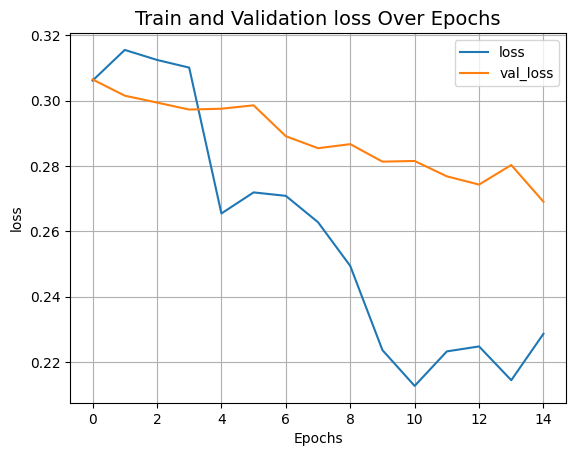

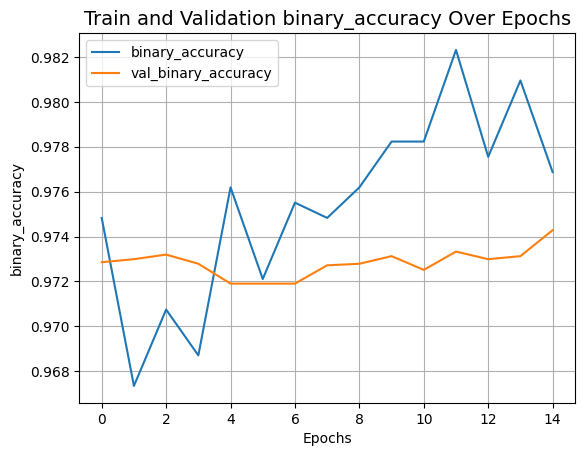

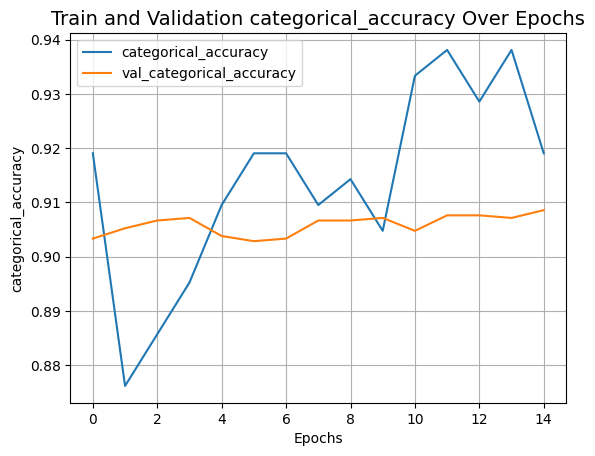

In [141]:
from matplotlib import pyplot as plt

def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")
plot_result("categorical_accuracy")

In [168]:
def max_index(arr):
    index = -1
    mx = -1
    for j in range(len(arr)):
        if arr[j] > mx:
            mx = arr[j]
            index = j

    return index


data_for_prediction = train_ds.take(1)

predictions = model.predict(data_for_prediction)

print(list(map(max_index, predictions)))

true_class = list(data_for_prediction.as_numpy_iterator())[0][-1]

print(len(true_class))

print(true_class)

print(predictions)

count = 0

cce = tf.keras.losses.CategoricalCrossentropy()

for i in range(len(predictions)):
    print("predict class =", max_index(predictions[i]), "true class =", max_index(true_class[i]))
    print(cce(predictions[i], true_class[i]).numpy())
    if max_index(predictions[i]) == max_index(true_class[i]):
        count += 1

print(count, len(list(data_for_prediction.as_numpy_iterator())[0][-1]))


1/1 [==============================] - 0s 28ms/step
[0]
1
[[0. 0. 0. 0. 0. 0. 1.]]
[[9.9975616e-01 2.5455673e-05 2.0307945e-05 1.8231739e-07 5.6637309e-05
  1.4003678e-04 1.2561485e-06]]
predict class = 0 true class = 6
16.118076
0 1
